# Transmissão de Energia Sem Fio (WPT)

Eletromagnetismo e Ondulatória - Engenharia da Computação 

Professor : Fábio Hage

Grupo:
- Ana Laiz Farias
- Diogo Lobo
- Isabella Amorim
- Tales Ivalque

### Diagrama do modelo eletrodinâmico do circuito WPT


![alt text](img/circuito_esquematico.png "circuito")

#### Importando bibliotecas utilizadas no projeto


In [2]:
from cmath import *
from numpy import linalg, round
import numpy as np
import matplotlib.pyplot as plt
import math 

#### Definindo parâmetros para os cálculos:

In [3]:
R1_ = 0.5
R2_ = 0.5
RC_ = 300

# Por design do circuito, assume-se valores para L1 e C1 e supõe-se que C2 e L2 serão iguais a suas contrapartidas do circuito primério.
L1_ = 10e-3
L2_ = L1_

C1_ = 10e-9
C2_ = C1_

# V1 padrão para a simulação e testagem
V1 = 5

#A frequencia de ressonancia
w_ref = 1 / math.sqrt(((L1_)) * C1_)
f_ref = w_ref / (2*np.pi)

print(f'A frequência de ressonância desse circuito é {round(abs(f_ref))}')

A frequência de ressonância desse circuito é 15915.0


# Parte 3

#### A função "parametros" devolve os valores de $ I_1 , I_2, I_C , V_2 $ 

![alt text](img/malhas.png "Malhas")

##### Fazendo os calculos da malha 2: 

$$ Z_{eq} = \frac{\frac{1}{j\omega{C}_{2}}R_{C}}{\frac{1}{j\omega{C}_{2}}+R_{C}} = \frac{R_{C}}{j\omega{R}_{C}{C}_{2} +1} $$

$$ j\omega M\hat{I}_{1} =  j\omega{L}_{2}\hat{I}_{2} + R_{2}\hat{I}_{2} + Z_{eq}\hat{I}_{2}$$

##### Fazendo os calculos da malha 1:

$$ \hat{V}_{f} = R_{1}\hat{I}_{1} + j\omega{L}_{1}\hat{I}_{1} + \frac{1}{j\omega{C}_{1}}\hat{I}_{1} - j\omega M\hat{I}_{2} $$

##### Matriz a ser resolvida

$$\begin{bmatrix} {R}_{1} + j\omega{L}_{1} + \frac{1}{j\omega{C}_{1}} & - j\omega M  \\ - j\omega M & j\omega{L}_{2} + R_{2} + Z_{eq}   \end{bmatrix} \begin{bmatrix} \hat{I}_{1} \\ \hat{I}_{2}  \end{bmatrix} = \begin{bmatrix} \hat{V}_{f} \\ 0  \end{bmatrix}$$

##### Foi Definindo uma função para resolução do circuito a partir de uma frequência de ressônância e um coeficiente de acoplamento,as variáveis foram assim definidas para que seja facilitado o uso da função para as várias análises. Note que, por padrão, as variáveis estão definidas para as da simulação inicial.

In [4]:
def parametros(w, k, Uf = 5, RC = 300, R1 = R1_, R2 = R2_, L1 = L1_, L2=L2_, C1=C1_, C2=C2_):

    '''para a malha 1, considerando Z = R + jX'''
    X_L1 = 1j*w*L1
    X_C1 = 1/(1j*w*C1)

    #Calculando a impedância equivalente da malha 1
    Z_eq1 = R1 + X_L1 + X_C1

    '''Para a malha 2, considerando Z = R + jX'''
    X_L2 = 1j*w*L2
    X_C2 = 1/(1j*w*C2)

    #calculando impedância equivalente entre o capacitor(C2) e o resistor (RC)
    Z_cr = ( RC* X_C2) / ( RC+ X_C2) 
    # Agora calculando a impedância equivalente da malha 2 inteira 
    Z_eq2 = R2 + X_L2 + Z_cr 

    ''' Agora, fazendo o Calculo de M e da sua impedância'''
    M = k*math.sqrt(L1*L2)
    X_M = 1j*w*M

    Z = np.array([[Z_eq1, -X_M],[-X_M,  Z_eq2]])
    V = np.array([V1, 0])

    #Com base nisso podemos calcular as corrente 
    I1,I2 = np.dot(linalg.inv(Z), V)
    V2 = Z_cr * I2
    IC = V2 / RC

    return I1,I2,V2,IC

##### Em seguida, plota-se o gráfico da corrente $ I_1 , I_2 $ em função da frequência, para assim, encontrar a frequência mais adequada através da análise visual de como a corrente se comporta em função da frequência.Com isso, também é possível observa como a corrente em RC(ou seja, $ V_2 $) muda conforme mudança de frenquência dado os componentes estipulados.

### Gráficos das Correntes $ I_1 , I_2 $ x Frequência

Frequência para corrente máxima: 15995.599559955996


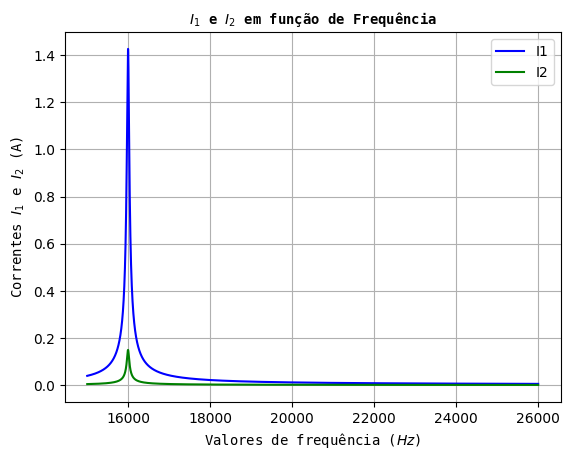

In [5]:
lista_frequencias = np.linspace(15000,26000,10000)
I1_params = []
I2_params = []
for f in lista_frequencias:
    w = 2*np.pi*f
    I1,I2, _, _ = parametros(w,0.1) # k = 0.1
    I1_params.append(abs(I1))
    I2_params.append(abs(I2))


I2max = max(I2_params)
#Descobre a respectiva frequência para corrente máxima
f_max= lista_frequencias[I2_params.index(I2max)]

plt.plot(lista_frequencias,I1_params,'b',label = ("I1"))
plt.plot(lista_frequencias,I2_params,'g',label = ("I2"))
plt.xlabel("Valores de frequência ($Hz$)",fontsize=10,fontfamily = 'monospace')
plt.ylabel("Correntes $I_1$ e $I_2$ (A)",fontsize=10,fontfamily = 'monospace')
plt.title("$I_1$ e $I_2$ em função de Frequência",fontsize=10 ,fontfamily = 'monospace',fontweight = 'semibold',color='k')
plt.legend(loc='best', prop={'size': 10})
plt.grid()

print('Frequência para corrente máxima: {}'.format(f_max))

Percebe-se que a frequência de ressonância calculada antes bate bem próxima da frequência com o pico de tensão no gráfico. Agora, analisando a frequência de pico variando com o coef. de acoplamento, mantendo os mesmos componentes.

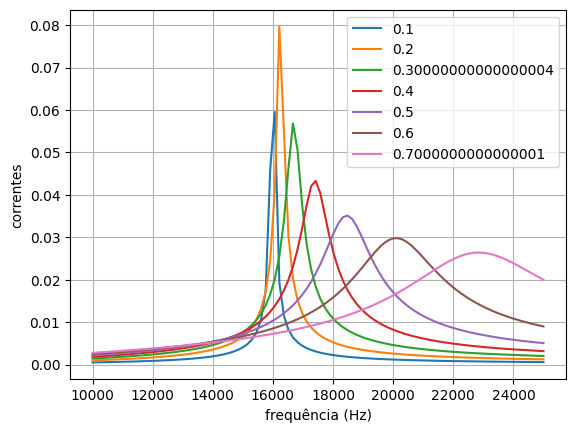

In [6]:
lista_I2 = []
c_k = np.arange(0.1, 0.8, 0.1)
lista_f = np.linspace(10e3, 25e3, 100)

for i in range(len(c_k)):
  
  lista_I2.append([])
  for f in lista_f:
    w = 2*math.pi*f
    lista_I2[i].append(parametros(w,c_k[i])[1])

  
  plt.plot(lista_f, np.abs(lista_I2[i]), label = (c_k[i]))

plt.xlabel("frequência (Hz)")
plt.ylabel("correntes")
  
plt.legend()
plt.grid()
plt.show()

# Parte 4

Nessa etapa, é possível analisar o comportamento do circuito para 6 indutâncias diferentes, variando também os valores de frequência, e assumindo uma Capacitância de forma que tal frequência seja a a frequência de ressonância.

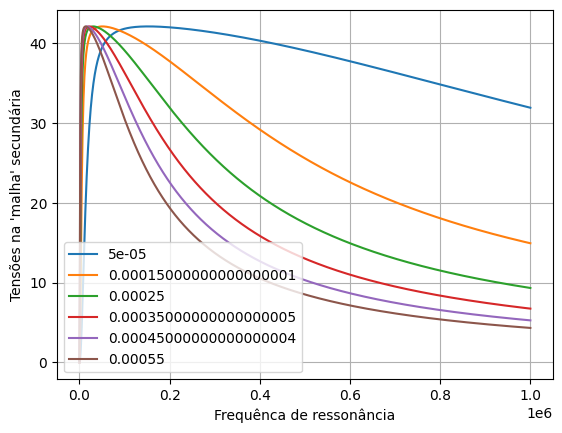

In [7]:
list_L = np.linspace(50e-6,550e-6,6) #lista de indutâncias
lista_fres = np.linspace(10, 10e5, 1000) #lista de frequências de ressonância indo de 10kHz até 100KHz

k = 0.1

for L in list_L:

    lista_V2 = []
    for f in lista_fres:
        C = 1 / (4*L*(np.pi*f)**2) # Capacitância dada a frequência de ressonância e Indutância do circuito
        
        I1, I2, V2, _ = parametros(L1 = L,L2=L,C1=C,C2=C,w=(f*2*np.pi),k=0.1) #correntes
        lista_V2.append(abs(V2))
        
    
    
    plt.plot(lista_fres, lista_V2, label = L)
    plt.xlabel("Frequênca de ressonância")
    plt.ylabel("Tensões na 'malha' secundária")

plt.legend() 
plt.grid()
plt.show()

# Parte 5

Nessa etapa, será observado como a transferência de energia é máxima, plota-se o gráfico da potência de entrada e de saída pela frequencia da fonte. Além da potência, é muito importante analisar a eficiência (rendimento) do circuito.

Variando a frequência, a potência máxima de saída é quando f = 16060.60606060606 Hz.


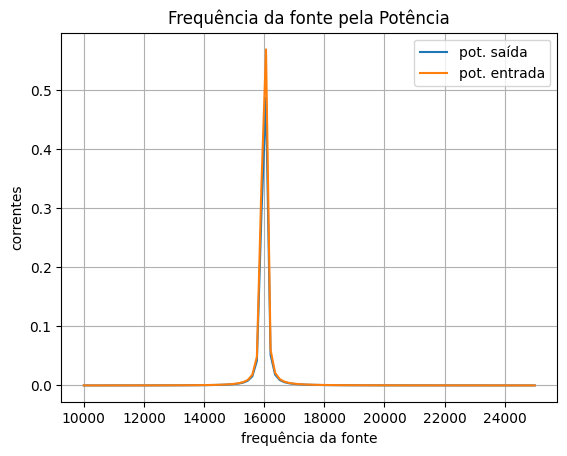

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


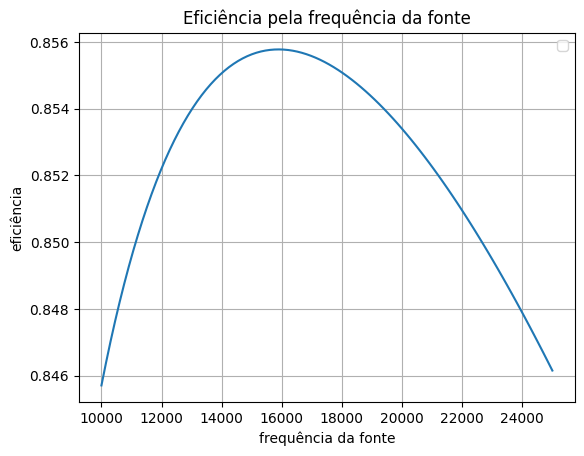

In [8]:
lista_f = np.linspace(10e3, 25e3, 100) #lista de frequênca das fontes
lista_Poti = [] #lista de potências de entrada
lista_Pots = [] #Lista de potências de saída
lista_n = [] #Lista de eficiências para cada frequência
#plt.figure(figsize = (15,10))  


for f in lista_f:
    I1, I2, V2, _ = parametros(2*np.pi*f,k,V1,RC_, R1_, R2_, L1_, L2_, C1_, C2_) # correntes
    
    #cálulo da potência total
    S1 = V1*I1.conjugate()/2
    S2 = V2*I2.conjugate()/2
    
    #cálculo da potência 
    P1 = np.real(S1)  # Potência efetiva (parte real) de S1
    P2 = np.real(S2)  # Potência efetiva (parte real) de S2
    
    #cálculo das Eficiências
    n = (P2/P1) # em %
    
    #acrescentando nas respectivas listas
    lista_Poti.append(P1)  # Adicionar P1 à lista de potências de entrada
    lista_Pots.append(P2)  # Adicionar P2 à lista de potências de saída
    lista_n.append(n)

index = lista_Pots.index(max(lista_Pots))
freq = lista_f[index]
print(f"Variando a frequência, a potência máxima de saída é quando f = {freq} Hz.")

plt.plot(lista_f, lista_Pots, label= "pot. saída")
plt.plot(lista_f, lista_Poti, label = "pot. entrada")
plt.xlabel("frequência da fonte")
plt.ylabel("correntes")
plt.title("Frequência da fonte pela Potência")
plt.legend()
plt.grid()
plt.show()

plt.plot(lista_f, lista_n)
plt.xlabel("frequência da fonte")
plt.ylabel("eficiência")
plt.title("Eficiência pela frequência da fonte")
plt.legend()
plt.grid()
plt.show()

# Parte 6

##### Gráfico: Tensão na Carga x K (constante de acoplamento)


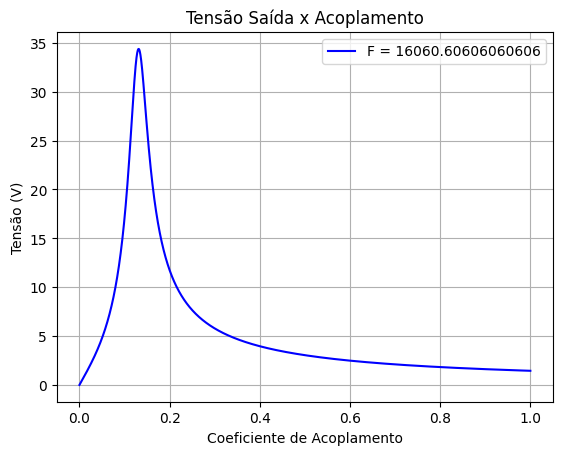

In [9]:
f = freq
lista_k = np.linspace(0,1,10000)
lista_v = []
for k in lista_k:
    I1,I2,V2,IC = parametros(2*math.pi*f,k)
    lista_v.append(abs(V2))

plt.plot(lista_k,np.abs(lista_v),'b',label = (f"F = {f}"))
plt.title('Tensão Saída x Acoplamento')
plt.legend()
plt.ylabel("Tensão (V)")
plt.xlabel("Coeficiente de Acoplamento")
plt.grid(True)
plt.show()

##### Pelo gráfico, é possível perceber uma tensão de saída maior quando o k está entre 0.1 e 0.17, por isso, é esperado uma melhor potência nesse intervalo.

# Comparação com o Real

#### Montagem do circuito de alimentação do primário

<div style="text-align:center; display:flex; justify-content:center;">
    <div style="margin-right: 20px;">
        <img src="img/circuito_primario2.jpg" alt="circuito" style="width:600px; height:600px;">
    </div>
    <div>
        <img src="img/circuito_primario.jpg" alt="circuito" style="width:600px; height:600px;">
    </div>
</div>

##### Analisado os modelos teóricos, foi criado um modelo real para o projeto. Para tal, existe, primeiramente, a necessidade de discutir quais componentes iremos utilizar. Dado a grande dificuldade de produção de capacitores, vamos utilizar os disponíveis no laboratório e produzir nossas próprias bobinas. Os capacitores disponíveis são: $ C={4.7μF,1μF,470ηF,100ηF,150ηF} $ Para descobrir uma indutância ideal para nossa bobina, vamos usar o mesmo método utilizado na Etapa 4, invertendo apenas o $ L $ e $ C $:

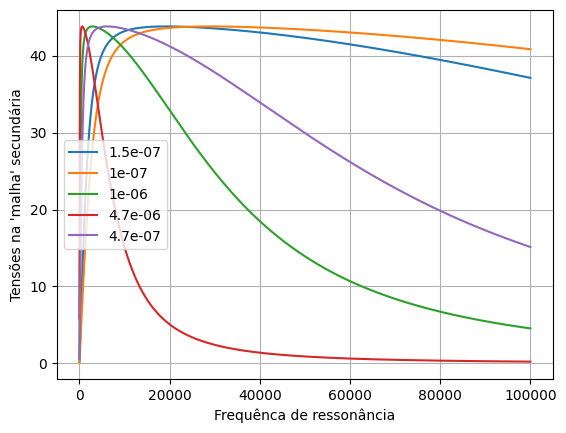

Os melhores valores de f são: [19327.387387387385, 29036.126126126124, 2912.6126126126123, 610.5405405405405, 6215.585585585585]
Os melhores valores de L2 são: [0.0004520668914141213, 0.00030044357072854874, 0.0029858969256811693, 0.014458172155292945, 0.0013950131569397946]


In [10]:
list_C = [150e-9, 0.1e-6, 1e-6, 4.7e-6, 4.7e-7] #lista de indutâncias
lista_fres = np.linspace(10, 100e3, 1000) #lista de frequências de ressonância indo de 10kHz até 100KHz
k = 0.1

best_Ls = []
best_fs = []

for C in list_C:
    
    lista_V2 = []
    list_Leq = []
    for f in lista_fres:
        L_ = 1 / (4*C*(pi*f)**2)
        list_Leq.append(L_)
        I1, I2, V2, _ = parametros(w = 2*pi*f,k = 0.1, L1=L_,L2=L_,C1=C,C2=C, RC=400)
        lista_V2.append(abs(V2))
    
    maximo = max(lista_V2)
    best_fs.append(lista_fres[lista_V2.index(maximo)])
    best_L = list_Leq[lista_V2.index(maximo)]
    best_Ls.append(best_L)

    plt.plot(lista_fres, lista_V2, label = C)
    plt.xlabel("Frequênca de ressonância")
    plt.ylabel("Tensões na 'malha' secundária")

plt.legend() 
plt.grid()
plt.show()

print(f"Os melhores valores de f são: {best_fs}")
print(f"Os melhores valores de L2 são: {best_Ls}")

##### A partir desse gráfico, encontramos um valor ótimo em $ L=452μH $, numa faixa de frequência próxima dos 20κHz, na qual faremos as próximas medições. Para construção de uma bobina com a indutância mais aproximada possível, foi seguida a recomendação do professor no enunciado do projeto.

<div style="text-align:center; display:flex; justify-content:center;">
    <div style="margin-right: 20px;">
        <img src="img/Criacao_bobinas.jpg" alt="circuito" style="width:600px; height:600px;">
    </div>
    <div>
        <img src="img/circuito_completo.jpg" alt="circuito" style="width:600px; height:600px;">
    </div>
</div>

## Comparação com o Real

##### Segue a simulação do circuito com as bobinas reais

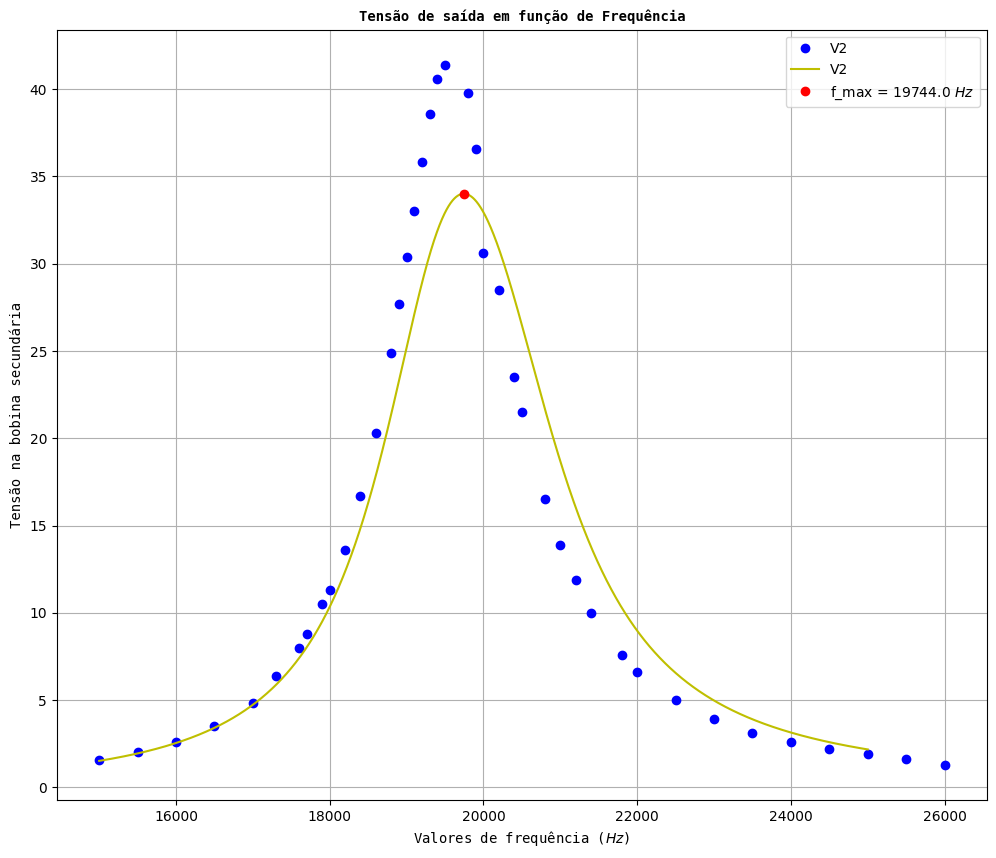

In [11]:
# A 20kHz:
r1 = 1.225
r2 = 1.318
rC = 300

l1 = 435.3e-6
l2 = 430.4e-6

c = 150e-9

V1 = 5

# Visualizando o comportamento de V2 esperado para várias frequências:
lista_frequencias = np.linspace(1.5e4,2.5e4,10000)
V2_freq = []

for f in lista_frequencias:
    w = 2*np.pi*f
    _,_, V2, _ = parametros(w,0.1,10/np.pi,R1=r1,R2=r2,L1=l1,L2=l2,C1=c,C2=c) # k = 0.1
    V2_freq.append(abs(V2))

V2_max = max(V2_freq)

#Descobre a respectiva frequência para corrente máxima
f_max= lista_frequencias[V2_freq.index(V2_max)]

real_freq = [15, 15.5,16,16.5,17,17.3,17.6,17.7,17.9,18,18.2,18.4,18.6,18.8,18.9,
             19,19.1,19.2,19.3,19.4,19.5,19.9,19.8,20,20.2,20.4,20.5,20.8,21,21.2,
             21.4,21.8,22,22.5,23,23.5,24,24.5,25,25.5,26]
real_freq = [i*1000 for i in real_freq]
real_tensao = [1.55,2.01,2.63,3.52,4.86,6.4,8,8.8,10.5,11.3,13.6,16.7,20.3,24.9,27.7,30.4,33,35.8,38.6,40.6,41.4,36.6,39.8,30.6,28.5,23.5,
               21.5,16.5,13.9,11.9,10,7.6,6.6,5,3.9,3.1,2.6,2.2,1.9,1.6,1.3]

plt.figure(figsize=(12, 10))
plt.plot(real_freq,real_tensao,'bo',label = ("V2"))

plt.plot(lista_frequencias,V2_freq,'y-',label = ("V2"))
plt.plot(f_max,V2_max,'ro', label = f'f_max = {round(f_max)} $Hz$')
plt.xlabel("Valores de frequência ($Hz$)",fontsize=10,fontfamily = 'monospace')
plt.ylabel("Tensão na bobina secundária",fontsize=10,fontfamily = 'monospace')
plt.title("Tensão de saída em função de Frequência",fontsize=10 ,fontfamily = 'monospace',fontweight = 'semibold',color='k')
plt.legend(loc='best', prop={'size': 10})
plt.grid()

##### É percepitível um leve deslocamento do gráfico, um erro que a equipe atribuiu às diferenças de resistência do circuito devido à frequência da corrente alternada. Entretanto, realizando medições no equipamento do LFI e utilizando o Excel para fazer uma regressão linear, foi obtido as seguintes equações para a resistência de cada bobina $ R1 = 0,054x + 0.5658 $ e $ R2 = 0.061x + 0.5226 $ , onde X é a frequência em kHz.

In [12]:
# A partir disso, criamos uma função em função apenas da frequência para visualizarmos como essa mudança afetaria o modelo teórico
def modelo2(f):
    # As variáveis foram assim definidas para que seja facilitado o uso da função para as várias análises
    # Note que, por padrão, as variáveis estão definidas para as da simulação inicial
    L1 = 435.3e-6 #(451.33 - 3.794*math.log(f/1000))*1e-6 
    L2 = 430.4e-6#(-5.229*math.log(f/1000) + 452.39)*1e-6 
    
    w = 2*np.pi*f
    
    C = 150e-9

    R1 = 0.054*(f/1000) + 0.5658
    R2 = 0.061*(f/1000) + 0.5226
    
    V1 = 10/np.pi

    '''para a malha 1, considerando Z = R + jX'''
    X_L1 = 1j*w*L1
    X_C1 = 1/(1j*w*C)

    #Calculando a impedância equivalente da malha 1
    Z_eq1 = R1 + X_L1 + X_C1

    '''Para a malha 2, considerando Z = R + jX'''
    X_L2 = 1j*w*L2
    X_C2 = 1/(1j*w*C)

    #calculando impedância equivalente entre o capacitor(C2) e o resistor (RC)
    Z_cr = ( 300* X_C2) / ( 300 + X_C2) 
    # Agora calculando a impedância equivalente da malha 2 inteira 
    Z_eq2 = R2 + X_L2 + Z_cr 

    ''' Agora, fazendo o Calculo de M e da sua impedância'''
    M = 0.08*math.sqrt(L1*L2)
    X_M = 1j*w*M

    Z = np.array([[Z_eq1, -X_M],[-X_M,  Z_eq2]])
    V = np.array([V1, 0])

    #Com base nisso podemos calcular as corrente 
    I1,I2 = np.dot(linalg.inv(Z), V)
    V2 = Z_cr * I2
    IC = V2 / 300

    return I1,I2,V2,IC

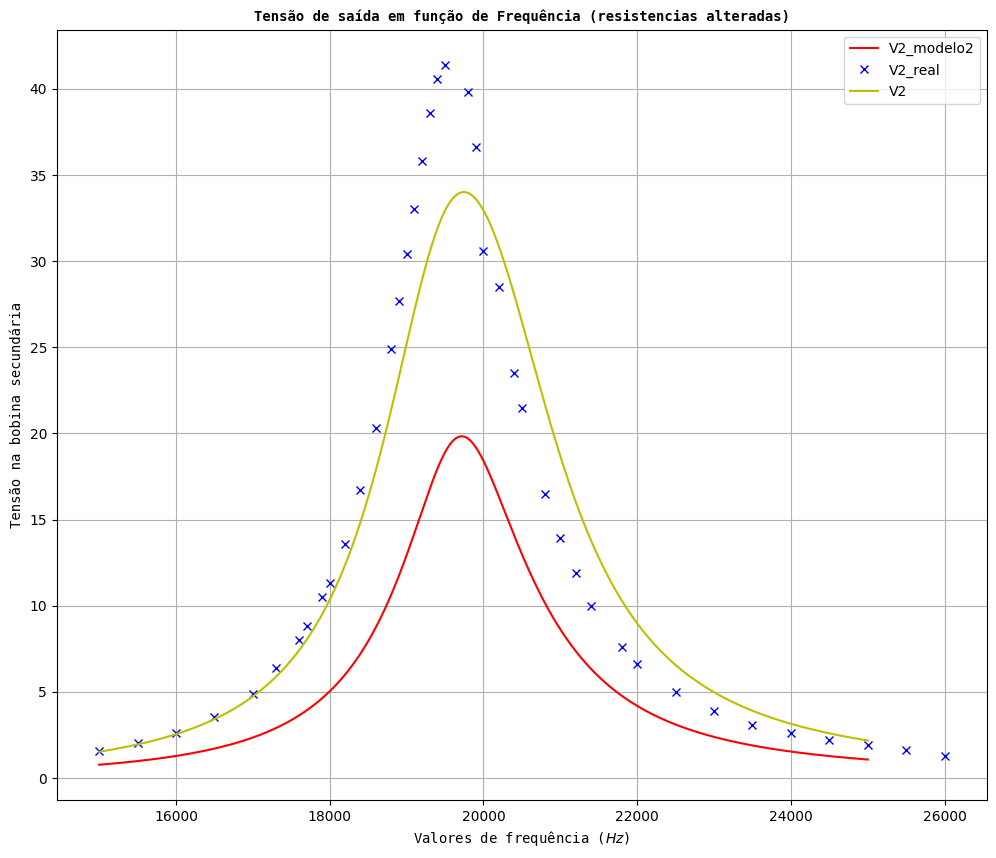

In [13]:
# Visualizando o novo modelo
lista_frequencias = np.linspace(1.5e4,2.5e4,10000)
V2_fmodelo2 = []

for f in lista_frequencias:
    _,_, V2, _ = modelo2(f) # k = 0.08
    V2_fmodelo2.append(abs(V2))

plt.figure(figsize=(12, 10))
plt.plot(lista_frequencias,V2_fmodelo2,'r-',label = ("V2_modelo2"))
plt.plot(real_freq,real_tensao,'bx',label = ("V2_real"))
plt.plot(lista_frequencias,V2_freq,'y-',label = ("V2"))
#plt.plot(f_max,V2_max,'ro', label = f'f_max = {round(f_max)} $Hz$')
plt.xlabel("Valores de frequência ($Hz$)",fontsize=10,fontfamily = 'monospace')
plt.ylabel("Tensão na bobina secundária",fontsize=10,fontfamily = 'monospace')
plt.title("Tensão de saída em função de Frequência (resistencias alteradas)",fontsize=10 ,fontfamily = 'monospace',fontweight = 'semibold',color='k')
plt.legend(loc='best', prop={'size': 10})
plt.grid()

# Conclusão 

Infelizmente o erro não foi explicado pelo efeito pelicular, mas há uma diminuição clara da voltagem de saida na bobina secundária, o que condiz com o efeito, que faz o circuito ter uma resitência aparente maior que a do modelo original. O grupo concluiu que o erro deve estar a um erro de medições no medidor LCR, já que em teste com resistências menores, o gráfico se tornou perto do que seria imaginado, com o modelo original sendo mais eficiente que as medições reais (pensando que modelos ideais são mais eficientes que os reais), e o modelo corrigido ficando mais próximo da realidade.

Link do Funcionamento do Projeto: https://www.youtube.com/watch?v=lZFoEMC6f7o